In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [158]:
data_train=np.load(r"Datasets\9_3_full-dataset\Primary categories - Train.npz")
data_val=np.load(r"Datasets\9_3_full-dataset\Primary categories - Validation.npz")
data_test=np.load(r"Datasets\9_3_full-dataset\Primary categories - Test.npz")

In [7]:
images_train=data_train['images']
labels_train=data_train['labels']

images_val=data_val['images']
labels_val=data_val['labels']

images_test=data_test['images']
labels_test=data_test['labels']

In [8]:
images_train=images_train/255.0
images_val=images_val/255.0
images_test=images_test/255.0

In [9]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, 5, activation='relu', input_shape=(120,90,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3)
                                ])
    
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [10]:
EPOCHS = 15
BATCH_SIZE = 64

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        mode = 'auto',
        min_delta = 0,
        patience = 2,
        verbose = 0, 
        restore_best_weights = True
    )

In [13]:
 model.fit(
        images_train,
        labels_train,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        callbacks = [early_stopping],
        validation_data = (images_val,labels_val),
        verbose = 2
    )

Epoch 1/15
203/203 - 124s - loss: 0.1052 - accuracy: 0.9668 - val_loss: 0.0073 - val_accuracy: 0.9988 - 124s/epoch - 609ms/step
Epoch 2/15
203/203 - 122s - loss: 0.0229 - accuracy: 0.9958 - val_loss: 0.1154 - val_accuracy: 0.9438 - 122s/epoch - 601ms/step
Epoch 3/15
203/203 - 124s - loss: 0.0191 - accuracy: 0.9964 - val_loss: 0.0081 - val_accuracy: 0.9981 - 124s/epoch - 610ms/step


In [14]:
 loss, accuracy = model.evaluate(images_val,labels_val)

51/51 [==============================] - 4s 82ms/step - loss: 0.0073 - accuracy: 0.9988


In [155]:
shoe=Image.open(r"imgs\shoe.jpg")
glasses=Image.open(r"imgs\glasses.jpg")
jeans=Image.open(r"imgs\jeans.jpg")
shoes=Image.open(r"imgs\shoes.jpg")
glasses_=Image.open(r"imgs\glasses_.jpg")
jeans_=Image.open(r"imgs\jeans_.jpg")
links=[r"imgs\glasses.jpg", r"imgs\jeans.jpg", r"imgs\shoe.jpg",
      r"imgs\glasses_.jpg", r"imgs\jeans_.jpg", r"imgs\shoes.jpg"]
img_list=[glasses,jeans,shoe,glasses_,jeans_,shoes]

1/1 [==============================] - 0s 16ms/step


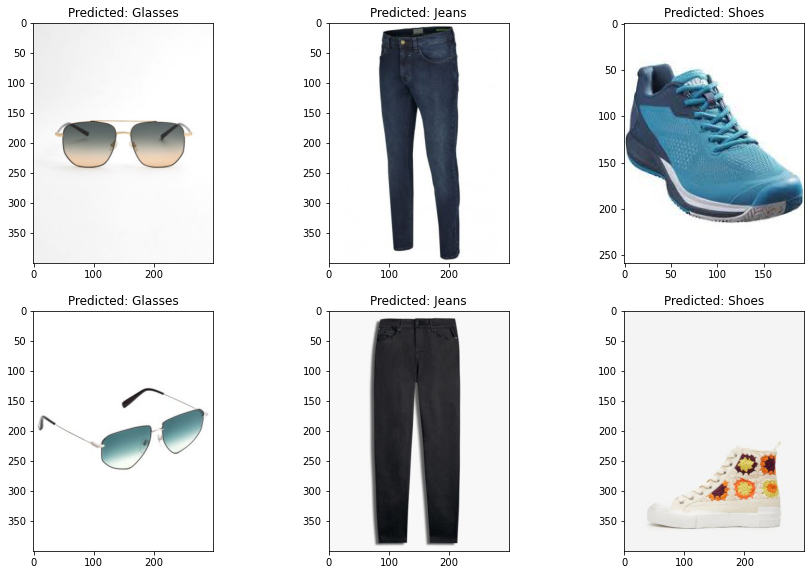

In [156]:
plt.figure(figsize=(15, 15))
for i in img_list:
    ax = plt.subplot(3, 3, img_list.index(i) + 1)
    img=plt.imread(links[img_list.index(i)])
    plt.imshow(img)
    i.thumbnail((90,120))
    img_array=np.asarray(i)
    img_array=tf.expand_dims(img_array,0)
    img_array=img_array/255
    predictions=model.predict(img_array)
    class_name=np.argmax(predictions)
    if class_name == 0:
        plt.title('Predicted: Glasses')
    elif class_name == 1:
        plt.title('Predicted: Jeans')
    else : plt.title('Predicted: Shoes')